In [40]:
print('Import required libraries')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

Import required libraries


In [41]:
data=pd.read_csv('wbcd.csv',header=None,na_values=['?'])


In [42]:
data.columns=['id','clump_thickness:','nuiformity_of_cell_size','uniformity_of_cell_shape','Marginal Adhesion'\
             ,'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','Mitoses','class']

In [43]:
data.describe()

,id,clump_thickness:,nuiformity_of_cell_size,uniformity_of_cell_shape,Marginal Adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,Mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [44]:
print('Drop missing value rows')
replacedData=data.dropna()

Drop missing value rows


In [45]:
X=replacedData.iloc[:,1:-1].values

In [46]:
Y=replacedData.iloc[:,-1].values

In [47]:
Y=(Y-2)/2 #to simplify

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3490, random_state=101)

In [49]:
c = tree.DecisionTreeClassifier()
c = c.fit(X_train, Y_train)

[Text(137.50714285714287, 207.55636363636364, 'X[1] <= 2.5\ngini = 0.463\nsamples = 444\nvalue = [282, 162]'),
 Text(77.72142857142858, 187.7890909090909, 'X[6] <= 4.5\ngini = 0.058\nsamples = 268\nvalue = [260, 8]'),
 Text(47.82857142857143, 168.0218181818182, 'X[0] <= 6.5\ngini = 0.015\nsamples = 259\nvalue = [257, 2]'),
 Text(23.914285714285715, 148.25454545454545, 'X[5] <= 4.5\ngini = 0.008\nsamples = 257\nvalue = [256, 1]'),
 Text(11.957142857142857, 128.48727272727274, 'gini = 0.0\nsamples = 251\nvalue = [251, 0]'),
 Text(35.871428571428574, 128.48727272727274, 'X[4] <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(23.914285714285715, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(47.82857142857143, 108.72, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(71.74285714285715, 148.25454545454545, 'X[3] <= 2.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(59.785714285714285, 128.48727272727274, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(83.7, 128.4872

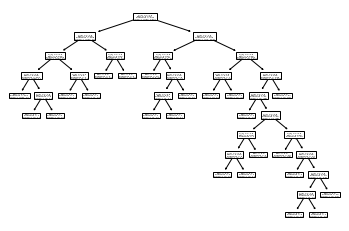

In [50]:
%matplotlib inline
tree.plot_tree(c)

In [51]:
Y_pred = c.predict(X_test)


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[151  11]
 [ 10  67]]
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       162
         1.0       0.86      0.87      0.86        77

    accuracy                           0.91       239
   macro avg       0.90      0.90      0.90       239
weighted avg       0.91      0.91      0.91       239



Text(0.5, 257.44, 'Predicted')

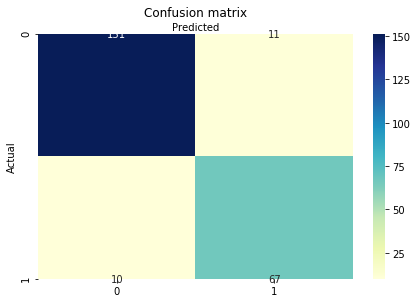

In [53]:
cnf_matrix=confusion_matrix(Y_test,Y_pred)
class_names=[0,1] # classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')